In [13]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import hf_routines as hf
import plotting as plt

In [15]:
# set STO-3G basis 
zeta = [1.4,1.4]
R = np.empty((2,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.4
R[1,1] = R[1,2] = 0.0
Z = [1.0,1.0]
basis_set = [hf.sto(3,zeta[i],R[i,:]) for i in range(2)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(2)]

In [16]:
S, Sinv = hf.overlap(basis_set)

In [17]:
# compute matrices and twoE that are not dependent on coefficients
T = hf.kinetic(basis_set)
V = hf.core_potential(basis_set,atoms)
Hcore = V + T
twoE = hf.compute_twoE(basis_set)

In [5]:
X = hf.orthogonalize_basis(S)
HcoreX = np.dot(np.dot(X.T,Hcore),X)
e, C = np.linalg.eig(HcoreX)
C = np.dot(X,C)
print e
print(C)
print(np.linalg.norm(C[:,0]))
print(np.linalg.norm(C[:,1]))
print(np.linalg.det(C))
P = hf.constructDensityMat(C)
print np.linalg.norm(P)

[-2.67764048 -1.29442632]
[[-0.14943329 -1.09953658]
 [-0.92612265  0.61123468]]
0.9381009881135998
1.2580097458133204
-1.1096445341777268
1.7600669277994245


In [6]:
e_sinv,v_sinv = np.linalg.eig(np.dot(Sinv,Hcore))
idx = e_sinv.argsort()
e_sinv = e_sinv[idx]
v_sinv = v_sinv[:,idx]
print(v_sinv)
SC = np.dot(S,v_sinv)
print(SC)
print(v_sinv[:,0]/np.sqrt(np.linalg.norm(SC[:,0])))
print(v_sinv[:,1]/np.sqrt(np.linalg.norm(SC[:,1])))
v_sinv[:,0] /= np.sqrt(np.linalg.norm(SC[:,0]))
v_sinv[:,1] /= np.sqrt(np.linalg.norm(SC[:,1]))
P = hf.constructDensityMat(v_sinv)
print np.linalg.norm(P)

[[ 0.15929478  0.87402848]
 [ 0.98723106 -0.48587469]]
[[ 0.58718592  0.66343934]
 [ 1.05627486 -0.10704933]]
[0.14490249 0.89803473]
[ 1.06618945 -0.59269747]
1.6549262235039128


In [7]:
e_s, v_s = np.linalg.eig(S)
print 1/np.sqrt(e_s)
print 1/np.linalg.det(S)
print np.linalg.det(np.dot(Sinv,S))
print np.linalg.det(Sinv)

[0.83524186 1.32852847]
1.2313066682555622
1.0000000000000002
1.2313066682555625


In [8]:
print np.linalg.det(X)
print np.linalg.det(X.T)
print np.linalg.det(X.T)**2
print np.linalg.norm(X[:,0])
print np.linalg.norm(X[:,1])

-1.1096445341777263
-1.1096445341777266
1.2313109922305039
0.8352422745542769
1.3285301378811112


In [9]:
U = np.array([[2**-0.5,2**-0.5],[2**-0.5,-(2**-0.5)]])
s = np.diag([(1+S[0,1])**-0.5,(1-S[0,1])**-0.5])
print np.linalg.det(U)
print np.linalg.det(s)

-1.0
1.1096445341777261


In [10]:
energy, C, P = hf.total_energy_Sinv(Hcore,Sinv,S,Hcore,P,atoms)
print(C)
print(P)

[[ 0.14490249  1.06618945]
 [ 0.89803473 -0.59269747]]
[[0.04199346 0.26025494]
 [0.26025494 1.61293276]]


In [23]:
X = hf.orthogonalize_basis(S)
HcoreX = np.dot(np.dot(X.T,Hcore),X)
e, C = np.linalg.eig(HcoreX)
print(C)
C = np.dot(X,C)
previousE = 0.0
deltaE = 1.0
thresh = 0.0001
iteration = 0 
while deltaE > thresh and iteration < 20:
    P = hf.constructDensityMat(C)
    G = hf.compute_G(P,twoE)
    F = Hcore + G
#    energy, C, P = hf.total_energy_Sinv(F,Sinv,S,Hcore,P,atoms)
    energy, C, P = hf.total_energy(F,X,Hcore,P,atoms)
    deltaE = abs(energy-previousE)
    previousE = energy
    iteration += 1
    print iteration, energy, deltaE

[[-1.00000000e+00 -6.57077245e-16]
 [ 5.82474671e-16 -1.00000000e+00]]
1 -1.0755063054374245 1.0755063054374245
2 -1.0755063054374245 0.0


In [19]:
print(C)

[[ 0.55947893  1.11435729]
 [ 0.55947893 -1.11435729]]


In [21]:
print(hf.optimal_C(S))

[[ 0.55947918  1.11435927]
 [ 0.55947918 -1.11435927]]


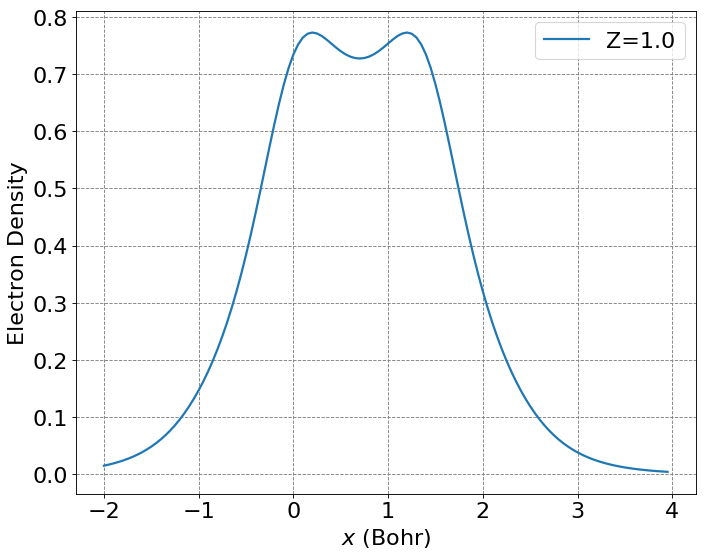

In [25]:
# plot electron density
x = np.arange(-2,4,0.05)
density1 = hf.compute_electron_density(basis_set,P,x)
#density2 = hf.compute_electron_density(basis_set,P_z_1_2,x)
ax = plt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density1,lw=2,label="Z=1.0")
#ax.plot(x,density2,lw=2,label="Z=2")
ax.legend(fontsize=20)

In [ ]:
print(integrate.simps(density2,x))
print(integrate.simps(density1,x))
print(integrate.simps(density2,x)/integrate.simps(density1,x))